<a href="https://colab.research.google.com/github/1021114Carlos/DS_deepDive/blob/main/Project_2_Housing_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statement: Develop a data driven regression model that can predict house sale prices with minimal error, measured by Root Mean Squared Percentage Error.

## Importing libraries and read in data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

In [ ]:
house_predict_df = pd.read_csv(" https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing.Data.csv")

In [ ]:
house_predict_df.shape

(2637, 81)

In [ ]:
house_predict_df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


### Data Exploration and Cleaning

>> *making a copy of the dataset and using this copy for data analysis*
>>> *Doing this to make modifications of the copied dataset*

In [ ]:
house_predict_df_copy = house_predict_df.copy()

In [ ]:
house_predict_df_copy.shape

(2637, 81)

### *Taking an initial visual examination of the variables*

In [ ]:
# !pip install pymupdf
# import  fitz
# import re

# # Open the PDF
# doc = fitz.open("Housing - Data Documentation.pdf")
# text = ""
# for page in doc:
#     text += page.get_text()

# # Regex pattern example to find nominal variables
# nominal_pattern = r"\n(.*?) \(Nominal\):"
# continuous_pattern = r"\n(.*?) \(Continuous)"
# ordinal_pattern = r"\n(.*?) \(Ordinal)"
# discrete_pattern = r"\n(.*?) \ (Discrete)"

# nominal_vars = re.findall(nominal_pattern, text)
# continuous_vars = re.findall(continuous_pattern, text)
# ordinal_vars = re.findall(ordinal_pattern, text)
# discrete_vars = re.findall(discrete_pattern, text)

# print("Variables:", pd.DataFrame(nominal_vars), pd.Dataframe(continuous_vars), pd.DataFrame(ordinal_vars), pd.Dataframe(discrete_vars))

<ipython-input-8-150212dc5d93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house_predict_df_copy.corr().round(2)


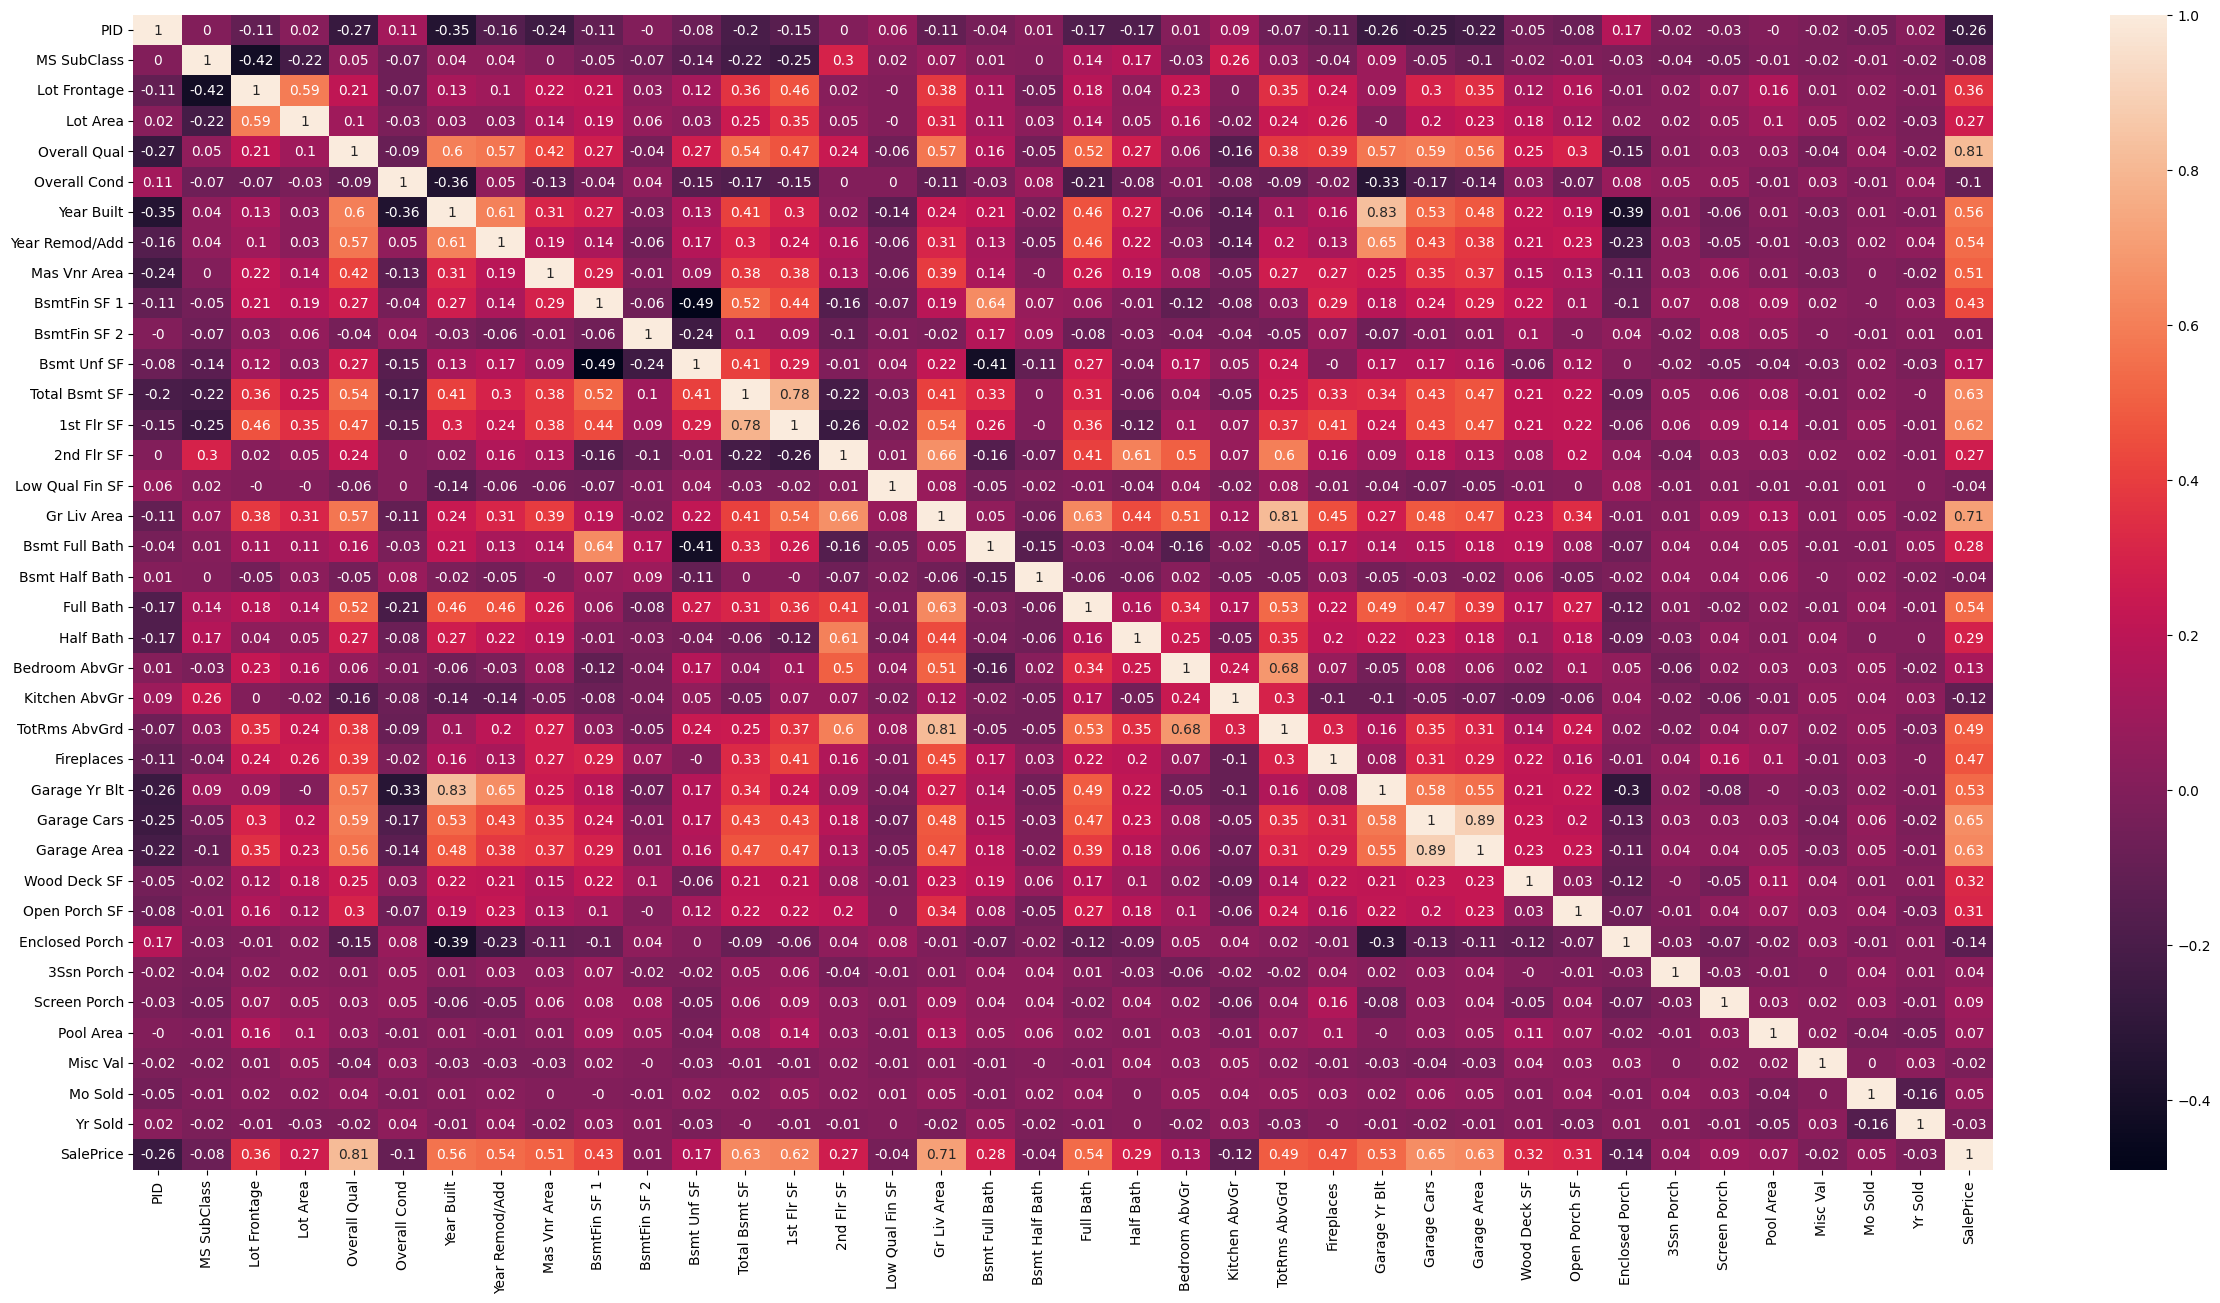

In [ ]:
plt.figure(figsize=(30,15))
correlation_matrix = house_predict_df_copy.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True);

In [ ]:
house_predict_df_copy.T

,0,1,2,3,4,5,6,7,8,9,...,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636
PID,905101070,905101330,903454090,533244030,909252020,905104210,906392070,905427050,907253060,902401030,...,907135040,907280040,909252170,534401130,535457020,903231070,906201021,533253070,527376100,528292060
MS SubClass,20,90,50,60,70,20,20,50,60,40,...,20,60,70,80,20,50,80,120,20,60
MS Zoning,RL,RL,RM,FV,RL,RL,RL,RL,RL,RM,...,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL
Lot Frontage,62.0,72.0,50.0,68.0,60.0,70.0,64.0,66.0,NaN,40.0,...,112.0,75.0,53.0,82.0,80.0,52.0,74.0,61.0,78.0,41.0
Lot Area,14299,10791,9000,7379,7200,8521,7314,21780,10316,5400,...,10859,9375,6720,9020,8000,6240,10778,3782,10140,12460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mo Sold,7,10,12,4,4,5,2,7,6,10,...,6,4,4,5,11,9,7,9,8,5
Yr Sold,2007,2006,2007,2010,2009,2010,2009,2008,2008,2007,...,2009,2010,2007,2008,2007,2006,2009,2009,2009,2008
Sale Type,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,WD,CWD,WD,WD,WD,WD,WD,WD,WD
Sale Condition,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal


In [ ]:
house_predict_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

### _Checking for Null values_

In [ ]:
# It can be observed that Lot Area, Pool QC, Fence, etc. Are missing values

house_predict_df_copy.isnull()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2633,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2634,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2635,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False


### _Determine percentage of missing data_

In [ ]:
# What is the percentage of data missing in relation to total data?
# First get size of total number of elements in dataframe.

house_predict_df_copy.size

213597

In [ ]:
# Second get total number of missing values.

house_predict_df_copy.isnull().sum().sum()

12624

In [ ]:
# This represents 5% of data missing out of the total dataset.

print("%.3f" % ((12624/213597)*100),"%" )

5.910 %


#### Splitting columns in int, float, etc.

#### _int_df subset_

In [ ]:
int_df = house_predict_df_copy.select_dtypes(include=np.number, exclude=float)
int_df.dtypes

PID                int64
MS SubClass        int64
Lot Area           int64
Overall Qual       int64
Overall Cond       int64
Year Built         int64
Year Remod/Add     int64
1st Flr SF         int64
2nd Flr SF         int64
Low Qual Fin SF    int64
Gr Liv Area        int64
Full Bath          int64
Half Bath          int64
Bedroom AbvGr      int64
Kitchen AbvGr      int64
TotRms AbvGrd      int64
Fireplaces         int64
Wood Deck SF       int64
Open Porch SF      int64
Enclosed Porch     int64
3Ssn Porch         int64
Screen Porch       int64
Pool Area          int64
Misc Val           int64
Mo Sold            int64
Yr Sold            int64
SalePrice          int64
dtype: object

In [ ]:
# confirming the value of 0 from previous line
int_df.isnull().sum().sort_values(ascending=False)

PID                0
Kitchen AbvGr      0
Yr Sold            0
Mo Sold            0
Misc Val           0
Pool Area          0
Screen Porch       0
3Ssn Porch         0
Enclosed Porch     0
Open Porch SF      0
Wood Deck SF       0
Fireplaces         0
TotRms AbvGrd      0
Bedroom AbvGr      0
MS SubClass        0
Half Bath          0
Full Bath          0
Gr Liv Area        0
Low Qual Fin SF    0
2nd Flr SF         0
1st Flr SF         0
Year Remod/Add     0
Year Built         0
Overall Cond       0
Overall Qual       0
Lot Area           0
SalePrice          0
dtype: int64

In [ ]:
# PID is a column with a identifier for each house. We'll drop it.
# There are a few interesting features such as Lot Area, 1st and 2nd Flr SF and Gr Liv Area.
int_df.drop(columns="PID")

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,14299,4,3,1964,1964,1005,0,0,1005,...,0,0,0,0,0,0,0,7,2007,115400
1,90,10791,4,5,1967,1967,1296,0,0,1296,...,0,0,0,0,0,0,500,10,2006,90000
2,50,9000,6,6,1937,1950,780,595,0,1375,...,0,162,0,0,126,0,0,12,2007,141000
3,60,7379,8,5,2000,2000,975,873,0,1848,...,280,184,0,0,0,0,0,4,2010,254000
4,70,7200,7,9,1936,2007,575,560,0,1135,...,256,0,0,0,0,0,0,4,2009,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,50,6240,6,6,1934,1950,816,0,360,1176,...,112,0,0,0,0,0,400,9,2006,114500
2633,80,10778,7,6,1990,1991,1061,0,0,1061,...,114,36,0,0,0,0,0,7,2009,162000
2634,120,3782,8,5,1981,1981,1226,0,0,1226,...,133,78,0,0,0,0,0,9,2009,211500
2635,20,10140,6,5,1974,1974,1350,0,0,1350,...,0,0,0,0,0,0,0,8,2009,165000


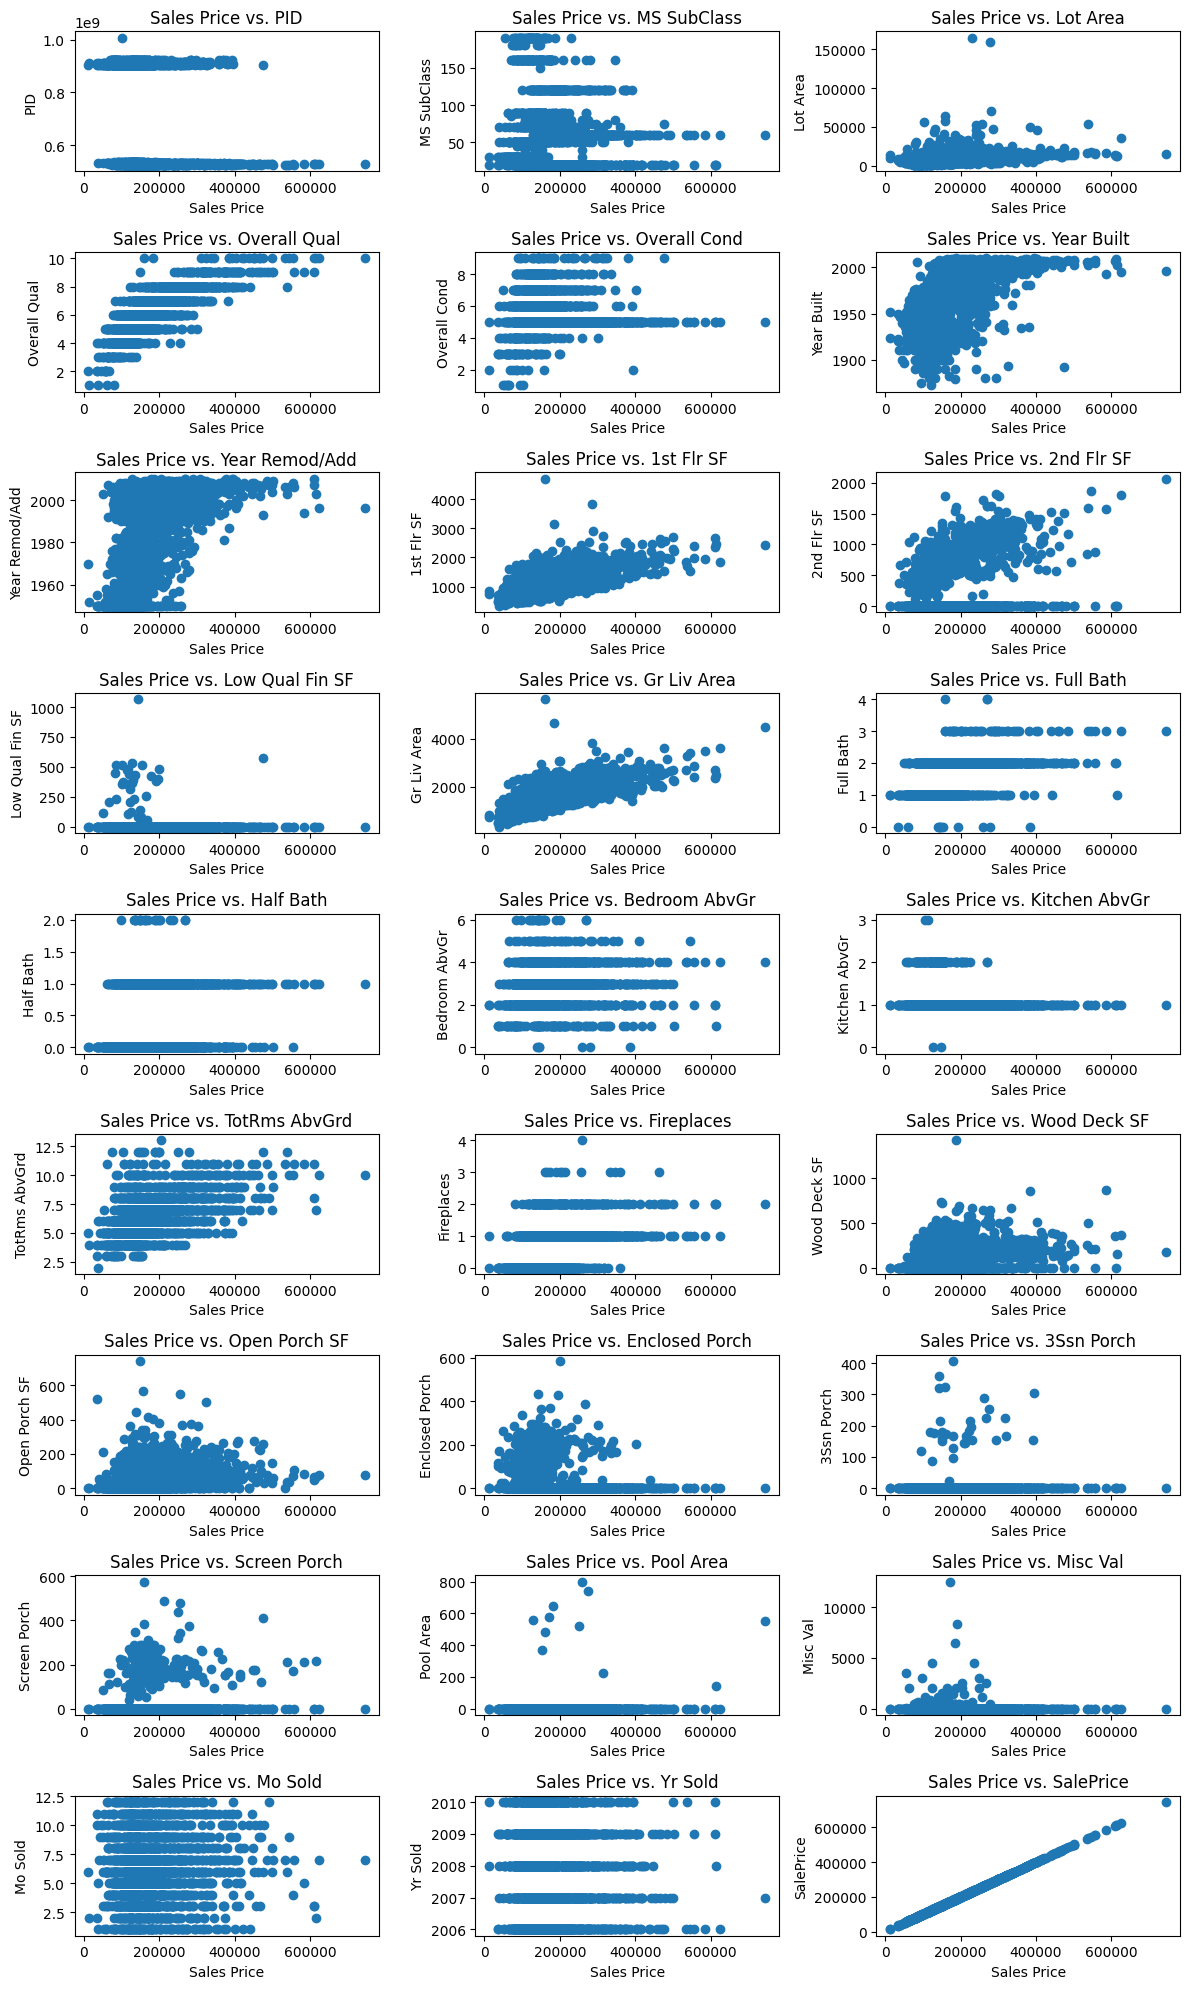

In [ ]:
n_features = len(int_df.columns)
rows = int(np.ceil(n_features / 3))

fig, axes = plt.subplots(rows, 3, figsize=(12, 20))

i = 0
for feature in int_df.columns:
    row, col = divmod(i, 3)
    axes[row, col].scatter(int_df["SalePrice"], int_df[feature])
    axes[row, col].set_xlabel("Sales Price")
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(f"Sales Price vs. {feature}")
    i += 1

plt.tight_layout()
plt.show()

### _Let's look at unique features for integer category_

In [ ]:
int_df_cols = list(int_df.columns)

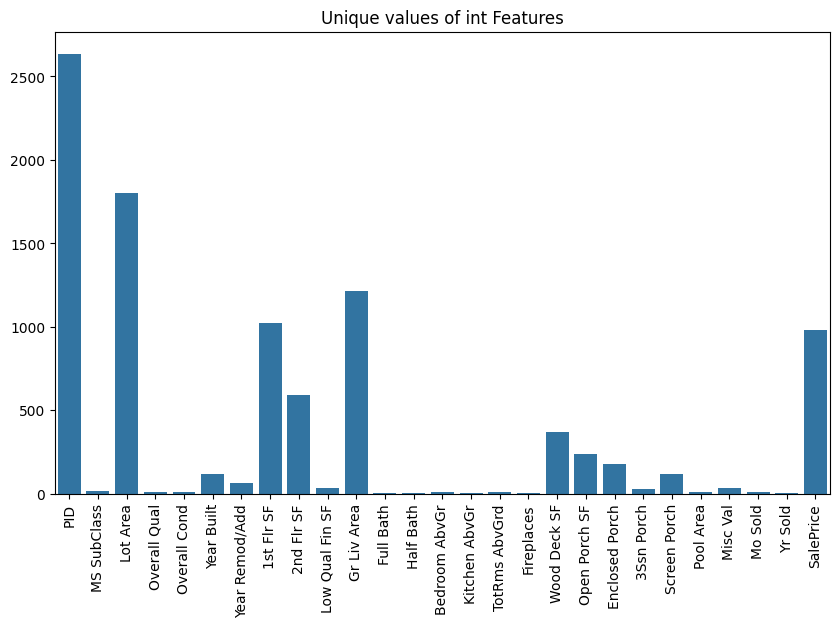

In [ ]:
unique_values = []
for col in int_df_cols:
  unique_values.append(int_df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('Unique values of int Features')
plt.xticks(rotation=90)
sns.barplot(x=int_df_cols,y=unique_values);

#### _float_df subset_

In [ ]:
float_df = house_predict_df_copy.select_dtypes(include=np.number, exclude=int)
float_df.dtypes

Lot Frontage      float64
Mas Vnr Area      float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Yr Blt     float64
Garage Cars       float64
Garage Area       float64
dtype: object

In [ ]:
# Missing values in the columns with float values.

float_df.isnull().sum().sum()

629

In [ ]:
null_stats = pd.DataFrame(float_df.isnull().sum(), columns=['missing_value_count'])
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / float_df.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)

,missing_value_count,% of dataset
Lot Frontage,449,17.03
Garage Yr Blt,147,5.57
Mas Vnr Area,23,0.87
Bsmt Full Bath,2,0.08
Bsmt Half Bath,2,0.08
BsmtFin SF 1,1,0.04
BsmtFin SF 2,1,0.04
Bsmt Unf SF,1,0.04
Total Bsmt SF,1,0.04
Garage Cars,1,0.04


In [ ]:
float_df

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,62.0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,440.0
1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,516.0
2,50.0,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,544.0
3,68.0,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,592.0
4,60.0,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,576.0
...,...,...,...,...,...,...,...,...,...,...,...
2632,52.0,0.0,0.0,0.0,816.0,816.0,0.0,0.0,1985.0,2.0,528.0
2633,74.0,0.0,460.0,286.0,308.0,1054.0,1.0,0.0,1990.0,2.0,462.0
2634,61.0,0.0,960.0,0.0,266.0,1226.0,1.0,0.0,1981.0,2.0,484.0
2635,78.0,174.0,0.0,0.0,1064.0,1064.0,0.0,0.0,1974.0,2.0,478.0


### _Filling missing values or NaN's with the mode_

In [ ]:
fill_nan = float_df.mode().iloc[0]

float_df.fillna(fill_nan, inplace=True)

In [ ]:
null_stats = pd.DataFrame(float_df.isnull().sum(), columns=['missing_value_count'])
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / float_df.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)

,missing_value_count,% of dataset


In [ ]:
float_df

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,62.0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,440.0
1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,516.0
2,50.0,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,544.0
3,68.0,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,592.0
4,60.0,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,576.0
...,...,...,...,...,...,...,...,...,...,...,...
2632,52.0,0.0,0.0,0.0,816.0,816.0,0.0,0.0,1985.0,2.0,528.0
2633,74.0,0.0,460.0,286.0,308.0,1054.0,1.0,0.0,1990.0,2.0,462.0
2634,61.0,0.0,960.0,0.0,266.0,1226.0,1.0,0.0,1981.0,2.0,484.0
2635,78.0,174.0,0.0,0.0,1064.0,1064.0,0.0,0.0,1974.0,2.0,478.0


#### _adding sale price target column to float_df to compare against other variables in this subset_

In [ ]:
float_df["SalePrice"] = int_df["SalePrice"]

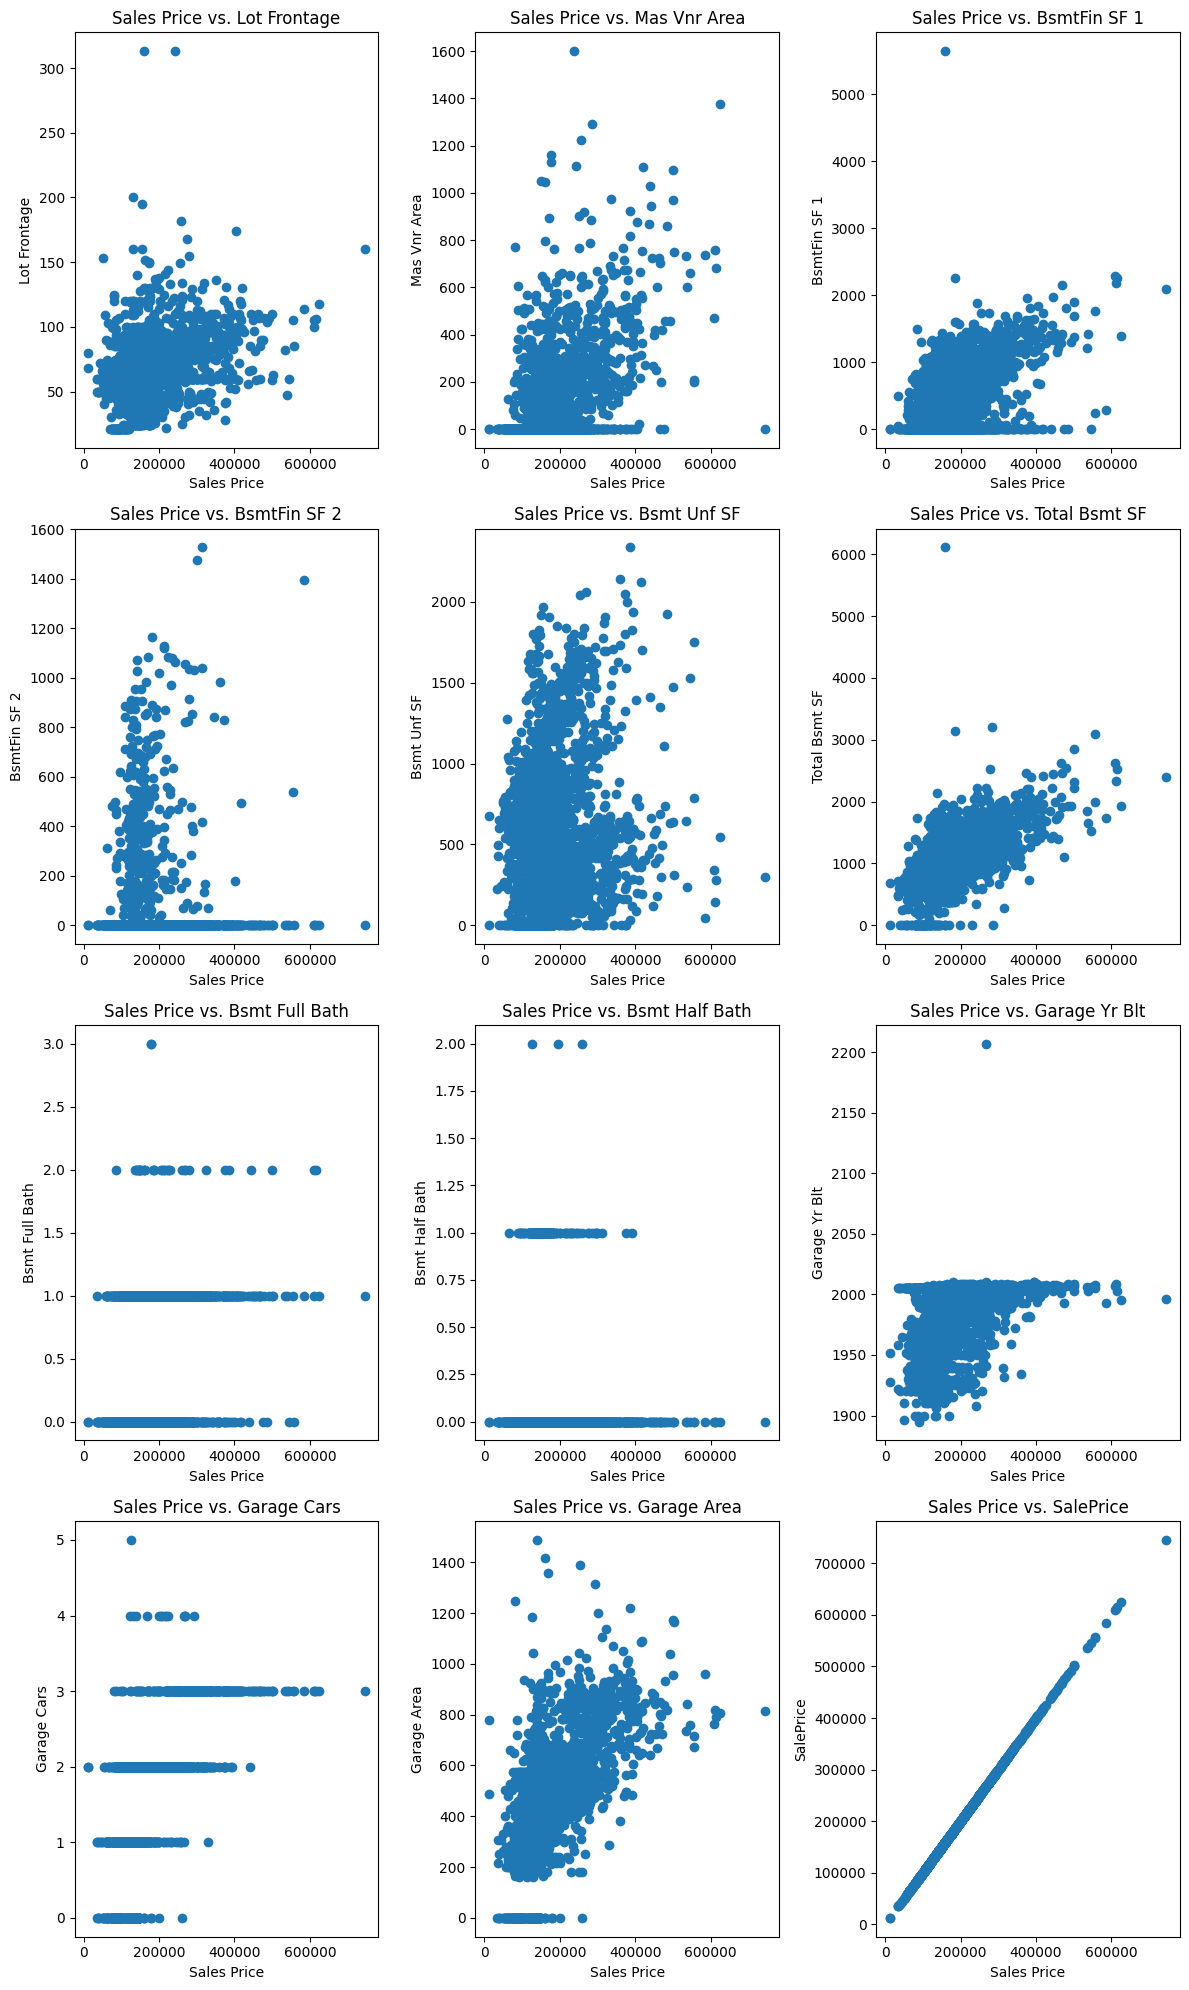

In [ ]:
n_features = len(float_df.columns)
rows = int(np.ceil(n_features / 3))

fig, axes = plt.subplots(rows, 3, figsize=(12, 20))

i = 0
for feature in float_df.columns:
    row, col = divmod(i, 3)
    axes[row, col].scatter(float_df["SalePrice"], float_df[feature])
    axes[row, col].set_xlabel("Sales Price")
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(f"Sales Price vs. {feature}")
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
float_cols = list(float_df.columns)

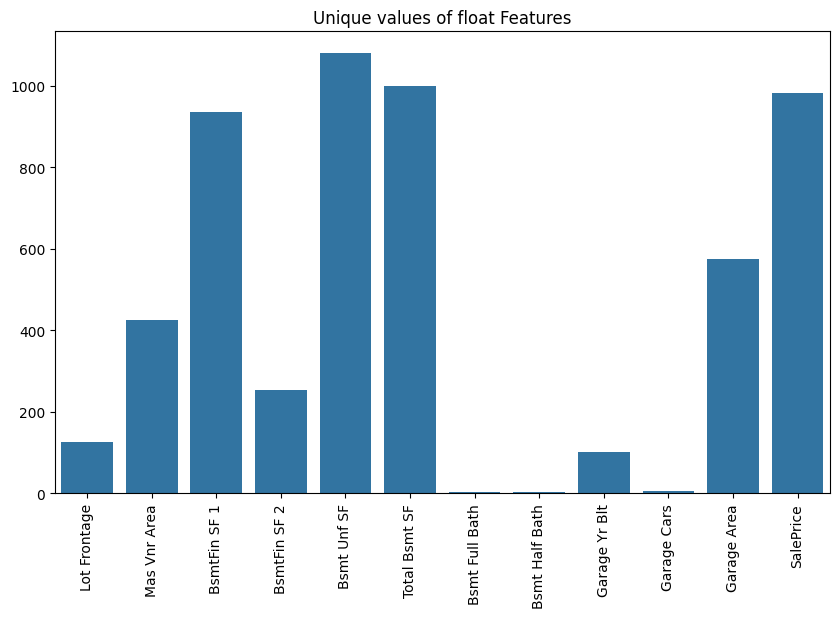

In [ ]:
unique_values = []
for col in float_cols:
  unique_values.append(float_df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('Unique values of float Features')
plt.xticks(rotation=90)
sns.barplot(x=float_cols,y=unique_values);

#### _object_df subset_

In [ ]:
object_df = house_predict_df_copy.select_dtypes(include=object, exclude=np.number)
object_df.dtypes

MS Zoning         object
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Pool QC           object
Fence             object


In [ ]:
# Missing values

object_df.isnull().sum().sum()

11995

In [ ]:
null_stats = pd.DataFrame(object_df.isnull().sum(), columns=['missing_value_count'])
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / object_df.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)

,missing_value_count,% of dataset
Pool QC,2626,99.58
Misc Feature,2541,96.36
Alley,2457,93.17
Fence,2109,79.98
Fireplace Qu,1284,48.69
Garage Finish,147,5.57
Garage Qual,147,5.57
Garage Cond,147,5.57
Garage Type,145,5.50
Bsmt Exposure,76,2.88


In [ ]:
object_cols = list(object_df.columns)

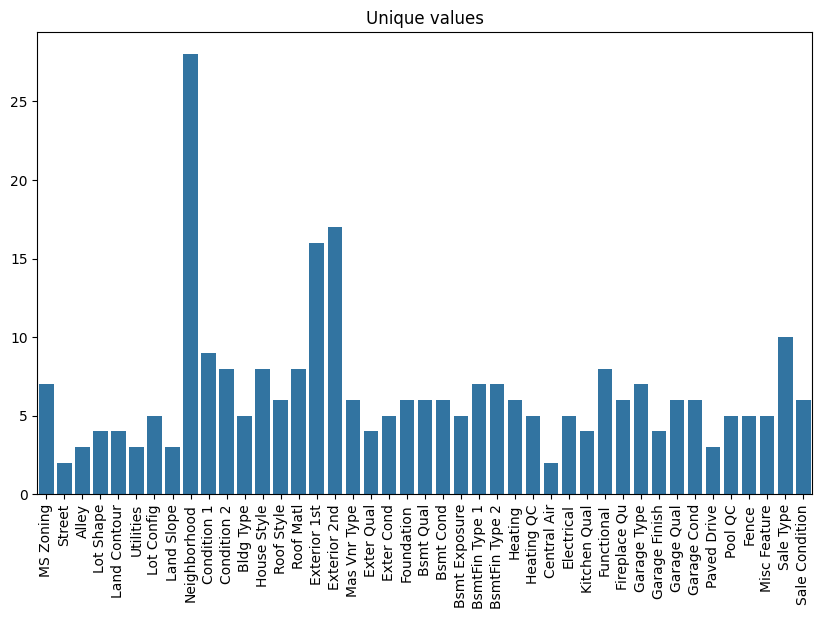

In [ ]:
unique_values = []
for col in object_cols:
  unique_values.append(object_df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('Unique values')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values);

## _Time to do Feature selection based on the observations_

In [ ]:
unique_features_int = int_df[["TotRms AbvGrd", "Bedroom AbvGr", "Full Bath", "Gr Liv Area", "1st Flr SF", "Year Built", "Overall Qual", "SalePrice"]]
unique_features_int

,TotRms AbvGrd,Bedroom AbvGr,Full Bath,Gr Liv Area,1st Flr SF,Year Built,Overall Qual,SalePrice
0,5,3,1,1005,1005,1964,4,115400
1,6,2,2,1296,1296,1967,4,90000
2,6,3,1,1375,780,1937,6,141000
3,7,3,2,1848,975,2000,8,254000
4,6,3,1,1135,575,1936,7,155000
...,...,...,...,...,...,...,...,...
2632,6,3,1,1176,816,1934,6,114500
2633,4,1,1,1061,1061,1990,7,162000
2634,4,1,1,1226,1226,1981,8,211500
2635,7,3,2,1350,1350,1974,6,165000


In [ ]:
unique_features_float = float_df[["Garage Cars", "Garage Area", "Bsmt Unf SF", "Mas Vnr Area"]]
unique_features_float

,Garage Cars,Garage Area,Bsmt Unf SF,Mas Vnr Area
0,2.0,440.0,348.0,0.0
1,2.0,516.0,0.0,0.0
2,1.0,544.0,780.0,0.0
3,2.0,592.0,491.0,0.0
4,2.0,576.0,0.0,0.0
...,...,...,...,...
2632,2.0,528.0,816.0,0.0
2633,2.0,462.0,308.0,0.0
2634,2.0,484.0,266.0,0.0
2635,2.0,478.0,1064.0,174.0


### _Will do one hot encoding on object features_

In [ ]:
unique_features_object = object_df[["Lot Config", "Neighborhood", "Lot Shape"]]
unique_features_object

,Lot Config,Neighborhood,Lot Shape
0,Inside,Sawyer,Reg
1,Inside,Sawyer,Reg
2,Inside,IDOTRR,Reg
3,Inside,Somerst,IR1
4,Inside,SWISU,Reg
...,...,...,...
2632,Inside,BrkSide,Reg
2633,Inside,SawyerW,IR1
2634,CulDSac,Greens,IR1
2635,Inside,NWAmes,Reg


In [ ]:
features_encoded_object = pd.get_dummies(unique_features_object)
features_encoded_object

,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2633,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2634,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2635,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## _Concatenating unique features dataframes_

In [ ]:
house_price_unique_features = pd.concat([unique_features_int, unique_features_float, features_encoded_object], axis = 1)
house_price_unique_features

,TotRms AbvGrd,Bedroom AbvGr,Full Bath,Gr Liv Area,1st Flr SF,Year Built,Overall Qual,SalePrice,Garage Cars,Garage Area,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
0,5,3,1,1005,1005,1964,4,115400,2.0,440.0,...,1,0,0,0,0,0,0,0,0,1
1,6,2,2,1296,1296,1967,4,90000,2.0,516.0,...,1,0,0,0,0,0,0,0,0,1
2,6,3,1,1375,780,1937,6,141000,1.0,544.0,...,0,0,0,0,0,0,0,0,0,1
3,7,3,2,1848,975,2000,8,254000,2.0,592.0,...,0,0,1,0,0,0,1,0,0,0
4,6,3,1,1135,575,1936,7,155000,2.0,576.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,6,3,1,1176,816,1934,6,114500,2.0,528.0,...,0,0,0,0,0,0,0,0,0,1
2633,4,1,1,1061,1061,1990,7,162000,2.0,462.0,...,0,1,0,0,0,0,1,0,0,0
2634,4,1,1,1226,1226,1981,8,211500,2.0,484.0,...,0,0,0,0,0,0,1,0,0,0
2635,7,3,2,1350,1350,1974,6,165000,2.0,478.0,...,0,0,0,0,0,0,0,0,0,1


### _Linear Regression techniques by Separating features and target variable_
>>> _using int_df dataframe_

### *Using linear Regression model*

In [ ]:
X = house_price_unique_features.drop("SalePrice", axis=1)
y = house_predict_df["SalePrice"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.2, shuffle=True)

model = LinearRegression()

model.fit(X_train, y_train);

In [ ]:
y_pred = model.predict(X_test)

model.score(X_train,y_train)

0.8465373391056858

In [ ]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
mae

21164.4292651731

In [ ]:
# Mean Square Error
mse = mean_squared_error(y_test, y_pred)
mse

1116167678.1379275

In [ ]:
# R-squared.
r_squared = r2_score(y_test, y_pred)
r_squared

0.8385600472009922

In [ ]:
rsmpe = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print("\nRoot Square Mean Percent Error on Test Set:", round(rsmpe,2),'%')


Root Square Mean Percent Error on Test Set: 19.85 %


## Using Lasso Regression

In [ ]:
X = house_price_unique_features.drop("SalePrice", axis=1)
y = house_predict_df["SalePrice"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.2, shuffle=True)

model = LinearRegression()

model.fit(X_train, y_train);

In [ ]:
model = Lasso(alpha=1)

selector = RFE(model, n_features_to_select=10, step=1)

model.fit(X_train, y_train);

In [ ]:
y_pred = model.predict(X_test)

model.score(X_train, y_train)

0.846536571461401

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

21180.73099308758

In [ ]:
rsmpe = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print("\nRoot Square Mean Percent Error on Test Set:", round(rsmpe,2),'%')


Root Square Mean Percent Error on Test Set: 19.86 %


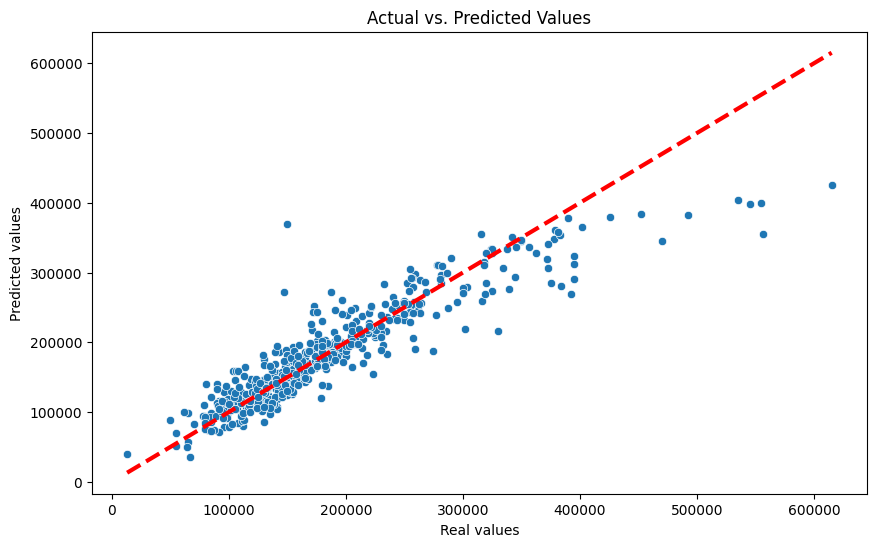

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Conclusion: Buying or selling a home is a big life event and we need to create good models that will help simplify the process and predict fair values. I can improve the prediction of our model by using more advanced techniques sucn as Random Forrest.